In [94]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import iradon
import h5py

from img_process import upscaleLinear, mirror_padding

In [95]:
# Open the H5 file in read mode
with h5py.File("signogram/True_Sinogram_1.h5", "r") as file:
    a_group_key = list(file.keys())[0]
    # Getting the data
    data = list(file[a_group_key])

In [96]:
data = np.array(data, dtype=np.float32).transpose()
data.shape

(888, 984)

In [97]:
theta = np.linspace(0.0, 360.0, max(data.shape), endpoint=False)
source_data = iradon(
    data,
    theta=theta,
    filter_name=None,  # "ramp",
    circle=False,
)

source_data_smooth = upscaleLinear(source_data, n=4)

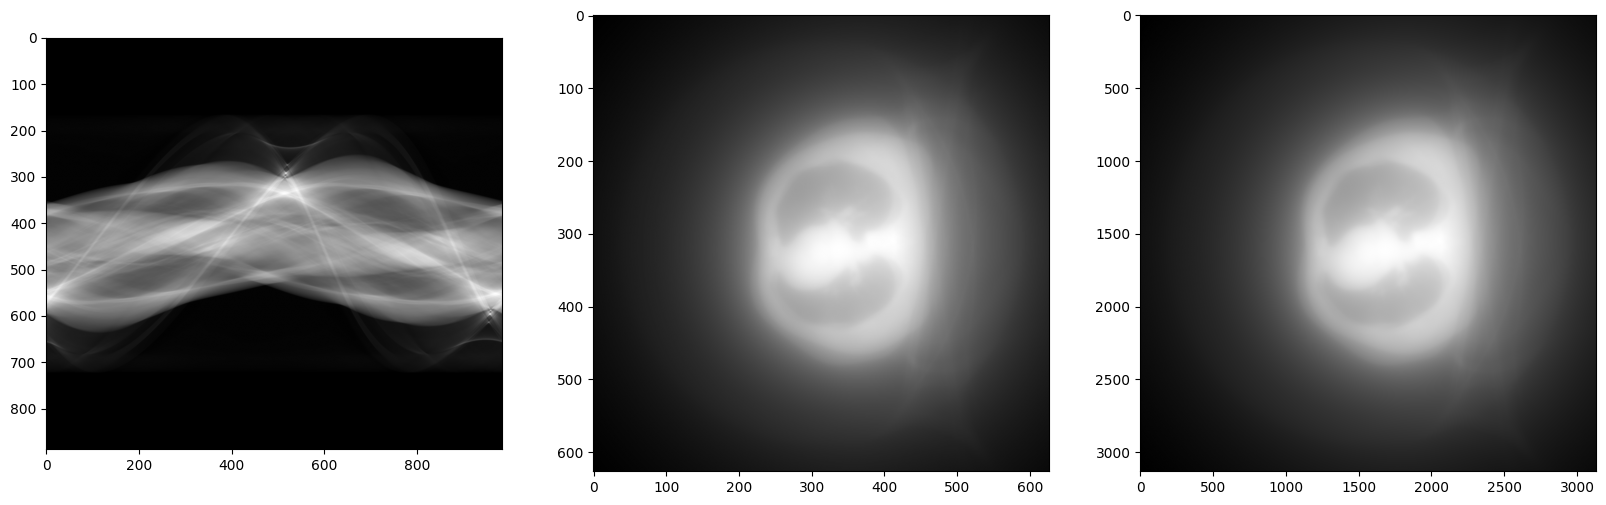

In [98]:
plt.figure(figsize=(20, 15))

plt.subplot(1,3,1)
plt.imshow(data, cmap='gray')

plt.subplot(1,3,2)
plt.imshow(source_data, cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(source_data_smooth, cmap="gray")

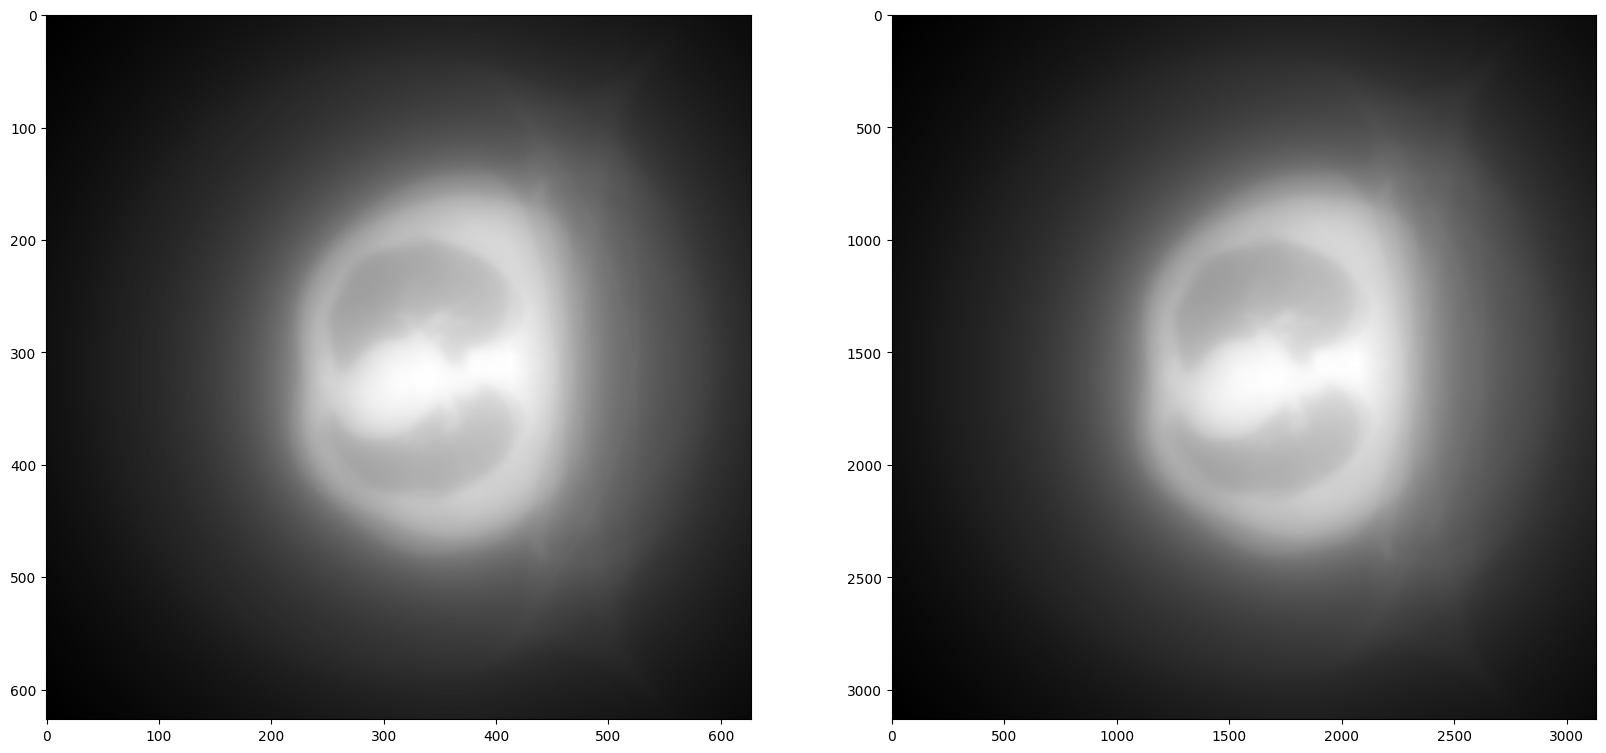

In [99]:
plt.figure(figsize=(20, 15))

plt.subplot(1, 2, 1)
plt.imshow(source_data, cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(source_data_smooth, cmap="gray")

In [100]:
def Sobal_Filter(img, return_abs=False):
    # Get Constant metrices
    wx = np.array([[-1.0, -2.0, -1.0], [0.0, 0.0, 0.0], [1.0, 2.0, 1.0]])
    wy = np.array([[-1.0, 0.0, 1.0], [-2.0, 0.0, 2.0], [-1.0, 0.0, 1.0]])
    # Get Constant metrices
    img = mirror_padding(img, 3, 3)
    m, n = img.shape
    output = np.zeros([m, n])
    for x in range(3, m - 3):
        for y in range(3, n - 3):
            elements = img[x - 3 // 2 : x + 3 // 2 + 1, y - 3 // 2 : y + 3 // 2 + 1]
            gx = np.sum(np.multiply(wx, elements))
            gy = np.sum(np.multiply(wy, elements))
            if return_abs == True:
                output[x, y] = np.abs(gx) + np.abs(gy)
            else:
                output[x, y] = np.sqrt(gx**2 + gy**2)
    return output[3 : m - 3, 3 : n - 3]

In [101]:
source_data_sobel = Sobal_Filter(source_data)

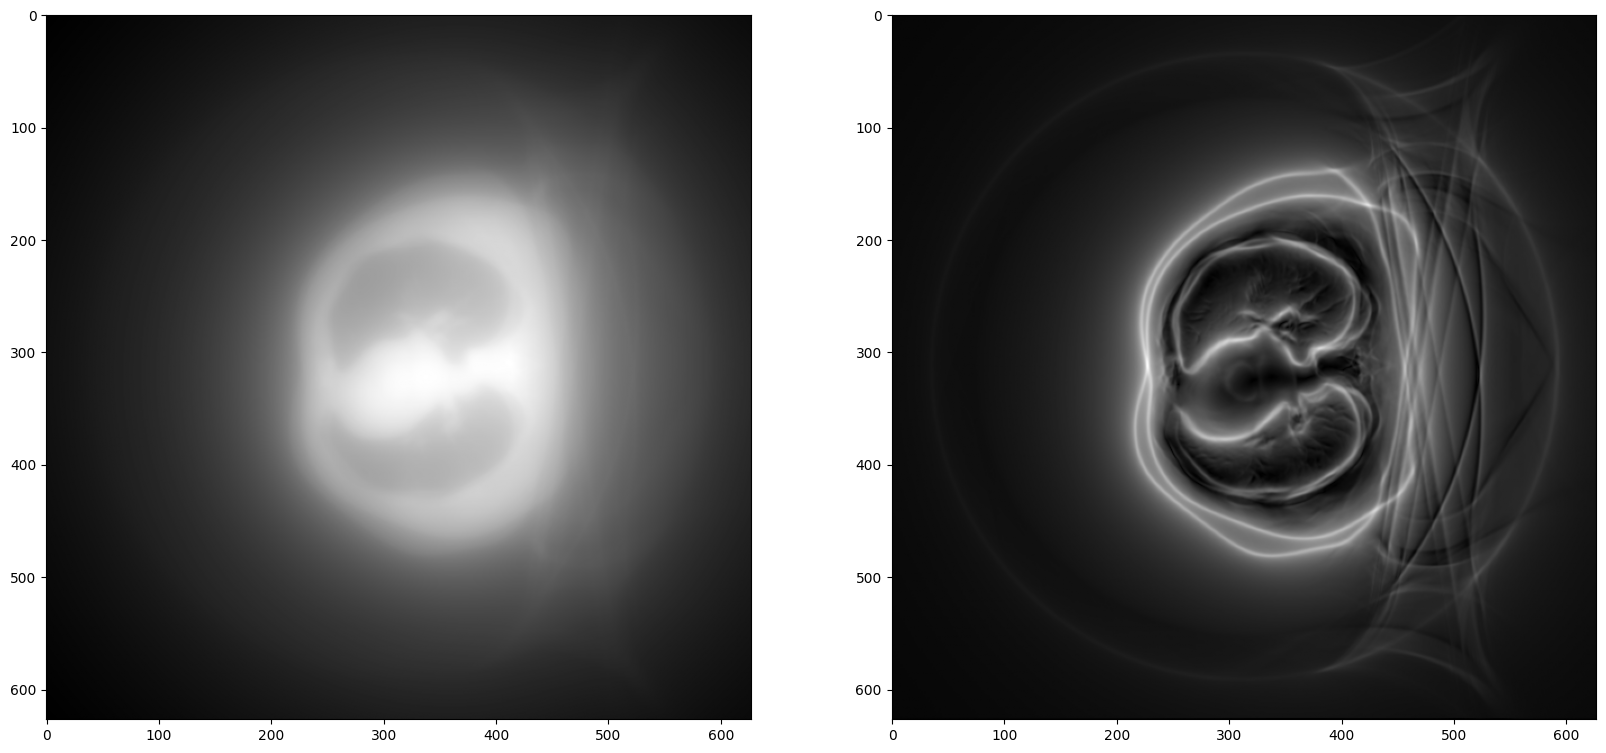

In [102]:
plt.figure(figsize=(20, 15))

plt.subplot(1, 2, 1)
plt.imshow(source_data, cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(source_data_sobel, cmap="gray")